In [112]:
import numpy as np
import matplotlib.pyplot as plt
import sys
plt.style.use('seaborn-whitegrid')
import random

#Q-2.1
The Travelling Salesman Problem (TSP) is the challenge of finding the shortest yet most efficient route for a person to take given a list of specific destinations. It is a challenge of finding the shortest route visiting each member of a collection of locations and returning to your starting point.

In [113]:
cost_mat= np.loadtxt('TSP11.csv', delimiter=',')
cost_mat

array([[  0.,  29.,  20.,  21.,  16.,  31., 100.,  12.,   4.,  31.,  18.],
       [ 29.,   0.,  15.,  29.,  28.,  40.,  72.,  21.,  29.,  41.,  12.],
       [ 20.,  15.,   0.,  15.,  14.,  25.,  81.,   9.,  23.,  27.,  13.],
       [ 21.,  29.,  15.,   0.,   4.,  12.,  92.,  12.,  25.,  13.,  25.],
       [ 16.,  28.,  14.,   4.,   0.,  16.,  94.,   9.,  20.,  16.,  22.],
       [ 31.,  40.,  25.,  12.,  16.,   0.,  95.,  24.,  36.,   3.,  37.],
       [100.,  72.,  81.,  92.,  94.,  95.,   0.,  90., 101.,  99.,  84.],
       [ 12.,  21.,   9.,  12.,   9.,  24.,  90.,   0.,  15.,  25.,  13.],
       [  4.,  29.,  23.,  25.,  20.,  36., 101.,  15.,   0.,  35.,  18.],
       [ 31.,  41.,  27.,  13.,  16.,   3.,  99.,  25.,  35.,   0.,  38.],
       [ 18.,  12.,  13.,  25.,  22.,  37.,  84.,  13.,  18.,  38.,   0.]])

In [114]:
T = np.arange(0,11)
T

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

#Q-2.4

In [115]:
def cost(schedule, cost_mat):
  cost = 0
  for i in range(len(schedule)-1):
    current = schedule[i]
    next = schedule[i+1]
    cost = cost + cost_mat[current, next]
  cost += cost_mat[schedule[len(schedule)-1], schedule[0]]
  return cost

#Q-2.5

In [116]:
def neighbour(schedule):
  neigh = []
  schedule1 = schedule.copy()
  schedule1[0] =  schedule1[0]
  schedule1[len(schedule1)-1] = schedule1[len(schedule1)-1]
  neigh.append(schedule1)
  for i in range(len(schedule)-1):
    schedule1 = schedule.copy()
    schedule1[i], schedule1[i+1] = schedule1[i+1], schedule1[i]
    neigh.append(schedule1)
  prob = np.random.uniform(1,1,len(neigh))/len(neigh)
  w = np.random.choice(np.arange(0, len(neigh)), p = prob)
  return neigh[w]

In [117]:
def accept_prob(old_cost, new_cost, temp):
  prob = np.exp(-(new_cost- old_cost)/temp)
  #print(prob)
  return prob

In [118]:
def simulated_annealing(n, cost_mat, max_iter, alpha, temp):
  schedule = np.arange(0,n)
  #random.seed(1000)
  random.shuffle(schedule)
  temp = temp
  old_cost = cost(schedule, cost_mat)
  sol = []
  for k in range(max_iter):
    neigh = neighbour(schedule)
    new_cost = cost(neigh, cost_mat)
    temp = temp * alpha
    if new_cost <= old_cost:
      schedule = neigh
      old_cost = new_cost
    if new_cost >= old_cost:
      if accept_prob(old_cost, new_cost, temp)> random.random():
        schedule = neigh
        old_cost = new_cost
    x = [old_cost, schedule]
    sol.append(x)
  return sol, old_cost, schedule

#Q-2.8
$\alpha = 0.85, T0 = 1$

In [119]:
sol_, cost_, schedule_ = simulated_annealing(11, cost_mat, 1000, alpha = 0.85, temp = 1)
print("Required path:\n")
for i in schedule_:
    print(i, "--> ", end='')
print("Cost:", cost_)

Required path:

4 --> 7 --> 8 --> 0 --> 3 --> 6 --> 1 --> 10 --> 2 --> 5 --> 9 --> Cost: 282.0


In [120]:
cost_2 = []
for i in range(len(sol_)):
  cost_2.append(sol_[i][0])


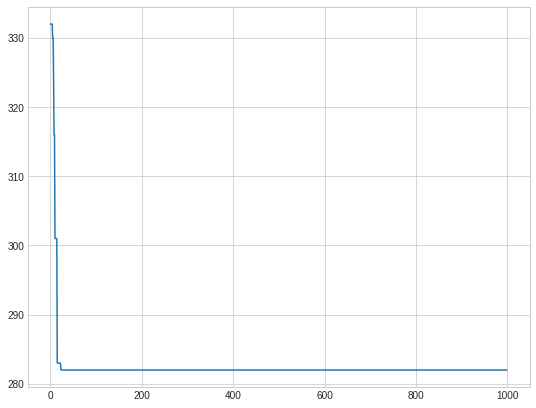

In [121]:
plt.figure(figsize=(9,7))
iter = np.arange(0, len(sol_))
plt.plot(iter, cost_2)

alpha = *0.99*, T0 = 1000

Required path:

1 --> 8 --> 0 --> 7 --> 2 --> 5 --> 9 --> 3 --> 4 --> 10 --> 6 --> Cost: 277.0


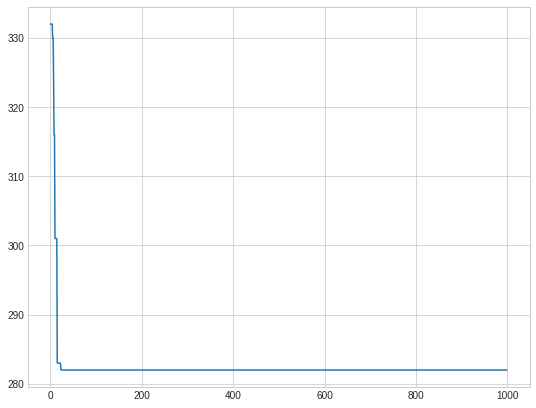

In [122]:
cost_2 = []
for i in range(len(sol_)):
  cost_2.append(sol_[i][0])
sol_, cost_, schedule_ = simulated_annealing(11, cost_mat, 1000, alpha = 0.99, temp = 1000)
print("Required path:\n")
for i in schedule_:
    print(i, "--> ", end='')
print("Cost:", cost_)
plt.figure(figsize=(9,7))
iter = np.arange(0, len(sol_))
plt.plot(iter, cost_2)

alpha = *0.97*, T0 = 100000

Required path:

0 --> 2 --> 5 --> 9 --> 7 --> 1 --> 6 --> 3 --> 4 --> 10 --> 8 --> Cost: 306.0


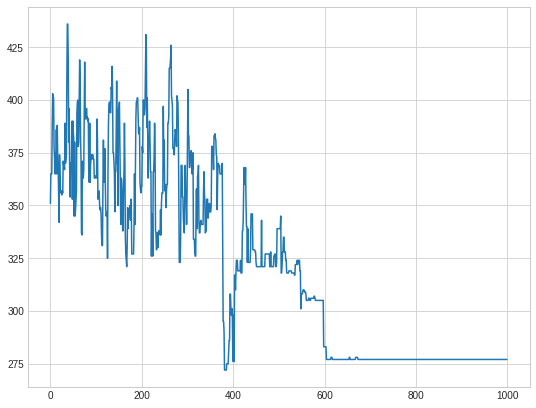

In [123]:
cost_2 = []
for i in range(len(sol_)):
  cost_2.append(sol_[i][0])
sol_, cost_, schedule_ = simulated_annealing(11, cost_mat, 1000, alpha = 0.99, temp = 1000)
print("Required path:\n")
for i in schedule_:
    print(i, "--> ", end='')
print("Cost:", cost_)
plt.figure(figsize=(9,7))
iter = np.arange(0, len(sol_))
plt.plot(iter, cost_2)

Clearly, as we increase the initial temperature, the sub-optimal solution obtained using stimulated annealing becomes more closer to the optimal solution.

#Q-2.9
An alternate cooling schedule can be the Logarithmical multiplicative cooling. 

for $\alpha \geq 0, \hspace{4mm} T_k = \frac{T_0}{1 + \alpha log(1+k)}$

This cooling schedule is expected to give better results than exponential cooling.

In [124]:
def simulated_annealing(n, cost_mat, max_iter, alpha, temp):
  schedule = np.arange(0,n)
  #random.seed(1000)
  random.shuffle(schedule)
  temp = temp
  old_cost = cost(schedule, cost_mat)
  sol = []
  for k in range(max_iter):
    neigh = neighbour(schedule)
    #print(neigh)
    new_cost = cost(neigh, cost_mat)
    temp_ = temp/(1+alpha*np.log(1+k))
    #print(temp)
    if new_cost <= old_cost:
      schedule = neigh
      old_cost = new_cost
    if new_cost >= old_cost:
      if accept_prob(old_cost, new_cost, temp)> random.random():
        schedule = neigh
        old_cost = new_cost
    x = [old_cost, schedule]
    #print(x, k)
    sol.append(x)
  return sol, old_cost, schedule

Required path:

4 ==> 6 ==> 1 ==> 10 ==> 2 ==> 7 ==> 3 ==> 9 ==> 5 ==> 0 ==> 8 ==> Cost: 283.0


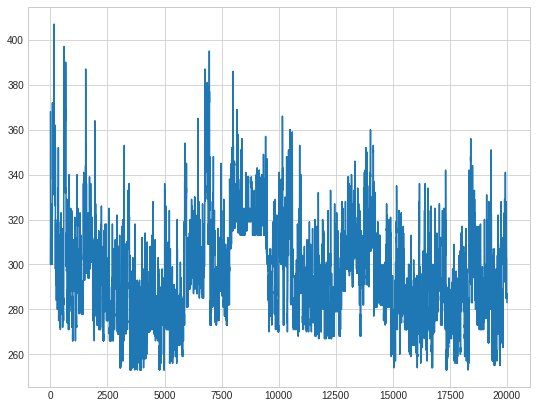

In [125]:
cost_2 = []
sol_, cost_, schedule_ = simulated_annealing(11, cost_mat, 20000, alpha = 0.9, temp = 10)
for i in range(len(sol_)):
  cost_2.append(sol_[i][0])
print("Required path:\n")
for i in schedule_:
    print(i, "==> ", end='')
print("Cost:", cost_)
import matplotlib.pyplot as plt #package useful for plotting
plt.figure(figsize=(9,7))
iter = np.arange(0, len(sol_))
plt.plot(iter, cost_2)

#Q-2.10

In [126]:
cost_mat= np.loadtxt('TSP48.csv', delimiter=',')
cost_mat

array([[   0., 4727., 1205., ..., 1542., 2379., 3744.],
       [4727.,    0., 3588., ..., 5461., 4390., 2088.],
       [1205., 3588.,    0., ..., 2023., 1867., 2560.],
       ...,
       [1542., 5461., 2023., ...,    0., 1644., 3928.],
       [2379., 4390., 1867., ..., 1644.,    0., 2532.],
       [3744., 2088., 2560., ..., 3928., 2532.,    0.]])

In [127]:
sol_, cost_, schedule_ = simulated_annealing(48, cost_mat, 10000, alpha = 0.95, temp = 1e+10)
print("Required path:\n")
for i in schedule_:
    print(i, "--> ", end='')
print("\nCost:", cost_)

Required path:

7 --> 29 --> 43 --> 1 --> 26 --> 39 --> 4 --> 42 --> 12 --> 2 --> 45 --> 41 --> 17 --> 32 --> 35 --> 0 --> 18 --> 33 --> 9 --> 30 --> 3 --> 6 --> 14 --> 31 --> 21 --> 5 --> 24 --> 16 --> 46 --> 8 --> 19 --> 40 --> 11 --> 25 --> 34 --> 23 --> 36 --> 22 --> 44 --> 13 --> 47 --> 37 --> 28 --> 38 --> 15 --> 27 --> 10 --> 20 --> 
Cost: 174479.0


In [128]:
cost_2 = []
for i in range(len(sol_)):
  cost_2.append(sol_[i][0])
print(100*(cost_2[0]- cost_2[len(cost_2)-1])/cost_2[0],"% improvement")

-5.6936031015265325 % improvement


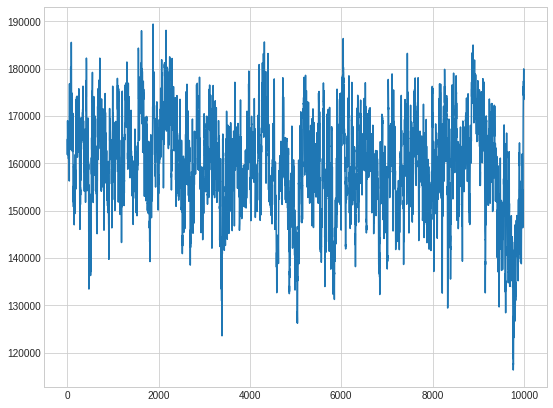

In [129]:
plt.figure(figsize=(9,7))
iter = np.arange(0, len(sol_))
plt.plot(iter, cost_2)